### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas

df = pandas.read_csv('/content/drive/MyDrive/RekaminAcademy/online_retail_II.csv')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## Section 1

### Create New Feature: Year

In [6]:
df['InvoiceDate'] = pandas.to_datetime(df['InvoiceDate']).dt.strftime('%Y-%m-%d')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom


In [7]:
df['Year'] = pandas.DatetimeIndex(df['InvoiceDate']).year
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,2011


### Filtering Data

In [8]:
no_sales = df[~df['Invoice'].str.contains('C', na=False)]
no_sales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,2011


In [9]:
sales = no_sales[no_sales['Quantity'] >= 1]
sales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,2011


### Create New Feature: Revenue

In [10]:
sales['Revenue'] = sales['Quantity'] * sales['Price'] 
sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,2011,14.85


### Average of Revenue per Year

In [12]:
sales.groupby('Year')['Revenue'].mean().reset_index()

,Year,Revenue
0,2009,18.713273
1,2010,19.908987
2,2011,20.058767


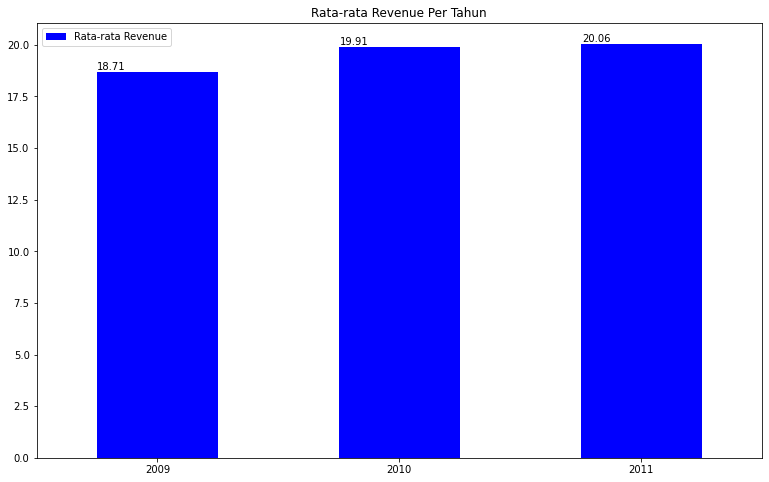

In [14]:
import matplotlib.pyplot as pl
import seaborn as sn

tahun2009 = sales.loc[sales.Year == 2009]
tahun2010 = sales.loc[sales.Year == 2010]
tahun2011 = sales.loc[sales.Year == 2011]

avg_year = [round(tahun2009['Revenue'].mean(axis=0), 2), round(tahun2010['Revenue'].mean(axis=0), 2),
          round(tahun2011['Revenue'].mean(axis=0), 2)]


index = [2009, 2010, 2011]

avg_yeara = pandas.DataFrame({'Rata-rata Revenue':avg_year}, index=index)
ax = avg_yeara.plot.bar(rot=0, color='blue', figsize=(13,8), 
                       title='Rata-rata Revenue Per Tahun', legend=True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Interpretation

Pada grafik diatas dapat disimpulkan bahwa rata-rata revenue (pendapatan) yang memiliki nilai paling besar/tinggi adalah di tahun 2011. Selain itu, di grafik bisa dilihat bahwa rata-rata revenue (pendapatan) dari tahun 2009 ke 2011 mengalami peningkatan. Kemudian, grafik juga membentuk pola positif linear (semakin besar X maka semakin besar juga Y)

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [15]:
finished = sales[sales['Customer ID'] >= 1]
finished

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,2011,14.85


#### Customers who canceled their purchases

In [17]:
cancel = df.set_index('Invoice').filter(like='C', axis=0)
cancel

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
Invoice,,,,,,,,
C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01,2.95,16321.0,Australia,2009
C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01,1.65,16321.0,Australia,2009
C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01,4.25,16321.0,Australia,2009
C489449,21896,POTTING SHED TWINE,-6,2009-12-01,2.10,16321.0,Australia,2009
C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...
C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09,0.83,14397.0,United Kingdom,2011
C581499,M,Manual,-1,2011-12-09,224.69,15498.0,United Kingdom,2011
C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09,10.95,15311.0,United Kingdom,2011


### Number of Finished and Canceled Transactions Each Year

In [18]:
number_finished = finished.count()
number_finished

Invoice        805620
StockCode      805620
Description    805620
Quantity       805620
InvoiceDate    805620
Price          805620
Customer ID    805620
Country        805620
Year           805620
Revenue        805620
dtype: int64

In [19]:
number_finished = finished.shape[0]
number_finished

805620

In [21]:
finished.groupby('Year')['Customer ID'].count().reset_index()

,Year,Customer ID
0,2009,30761
1,2010,403094
2,2011,371765


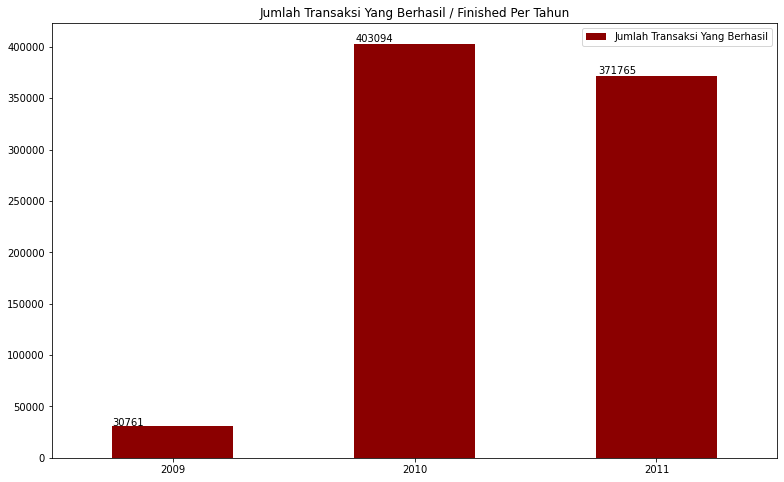

In [22]:
tahun2009fin = finished.loc[finished.Year == 2009]
tahun2010fin = finished.loc[finished.Year == 2010]
tahun2011fin = finished.loc[finished.Year == 2011]

count_year = [round(tahun2009fin['Customer ID'].count(), 2), round(tahun2010fin['Customer ID'].count(), 2),
          round(tahun2011fin['Customer ID'].count(), 2)]


index = [2009, 2010, 2011]

count_yeara = pandas.DataFrame({'Jumlah Transaksi Yang Berhasil':count_year}, index=index)
ax = count_yeara.plot.bar(rot=0, color='darkred', figsize=(13,8), 
                       title='Jumlah Transaksi Yang Berhasil / Finished Per Tahun', legend=True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [23]:
number_cancel = cancel.count()
number_cancel

StockCode      19494
Description    19494
Quantity       19494
InvoiceDate    19494
Price          19494
Customer ID    18744
Country        19494
Year           19494
dtype: int64

In [24]:
number_cancel = cancel.shape[0]
number_cancel

19494

In [26]:
number_cancelpertahun = cancel.groupby('Year')['Customer ID'].count().reset_index()
number_cancelpertahun

,Year,Customer ID
0,2009,999
1,2010,9530
2,2011,8215


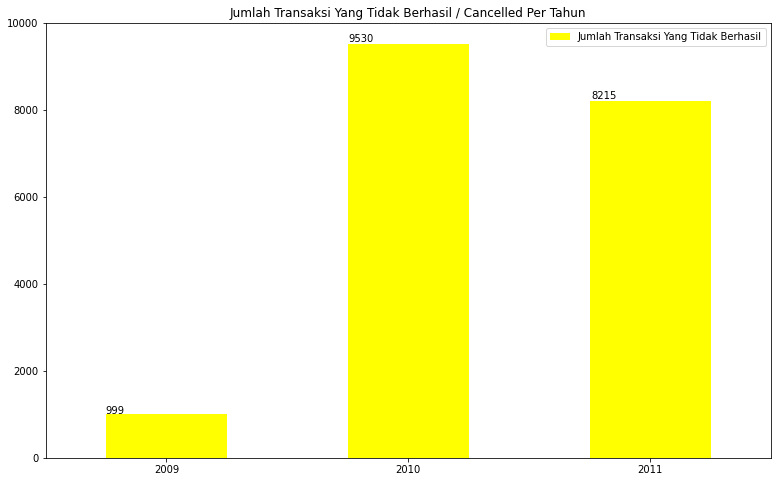

In [27]:
tahun2009can = cancel.loc[cancel.Year == 2009]
tahun2010can = cancel.loc[cancel.Year == 2010]
tahun2011can = cancel.loc[cancel.Year == 2011]

count_yearr = [round(tahun2009can['Customer ID'].count(), 2), round(tahun2010can['Customer ID'].count(), 2),
          round(tahun2011can['Customer ID'].count(), 2)]


index = [2009, 2010, 2011]

count_yearb = pandas.DataFrame({'Jumlah Transaksi Yang Tidak Berhasil':count_yearr}, index=index)
ax = count_yearb.plot.bar(rot=0, color='yellow', figsize=(13,8), 
                       title='Jumlah Transaksi Yang Tidak Berhasil / Cancelled Per Tahun', legend=True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Cancellation Rate

In [28]:
number_cancelpertahun['Cancellation Rate'] = number_cancelpertahun['Customer ID']/number_cancel*100
number_cancelpertahun

,Year,Customer ID,Cancellation Rate
0,2009,999,5.124654
1,2010,9530,48.886837
2,2011,8215,42.141172


### Interpretation



Berdasarkan perhitungan dan analisa yang telah dilakukan diatas:

1. Dapat disimpulkan untuk nomor 3 (Number of Finished
   and Canceled Transactions Each Year) di grafik yang
   telah dibuat diatas, bahwa:
   
   Pola grafiknya sama, artinya disini transaksi yang
   berhasil (finished) dan tidak berhasil (cancelled)
   dengan jumlah terbanyak ada di tahun 2010 (Finsihed =
   403094, Cancelled = 9530). kemudian untuk, jumlah
   terbanyak kedua ada di tahun 2011 (Finished = 371765
   Cancelled = 8215), dan jumlah terkecil ada di tahun
   2009 (Finished = 30761, Cancelled = 999).

2. Untuk nomor 4 (Cancellation Rate), rasio/rate
   cancellation tertinggi ada di tahun 2010, yaitu
   sebesar 48.886837 dan terkecilnya ada di tahun 2009
   yaitu sebesar 5.124654

